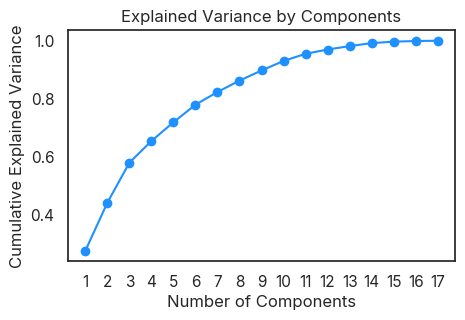

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy 
from scipy import stats
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle 
sns.__version__
import esploco.plotTools as plotTools
import io
import sklearn
plotTools.setFont('Inter', 9)
import os
import matplotlib.patches as patches
sns.set()
# from setFont import setFont
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
%matplotlib inline
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'

sns.set_style("white")

if 'plots' not in os.listdir():
    os.mkdir('plots')
w1118 = pd.read_csv(picklepath + 'W1118Dark_ele.csv')

vectorselection = [
                    'Volume', 
                   'Feed Speed', 
                   'Meal Size', 
                   'Meal Duration', 
                   'Duration', 
                   'Latency', 
                   'Speed',
                  'Prefeed Speed',
                   'Duringfeed Speed', 
                   'Postfeed Speed',
                   'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio', 
                    'Food Port Occupancy',
                    'Ctrl Port Occupancy',
                   'Falls',
                    'Count',
                    'Height'
                  ] 


In [ ]:
w1118Big

Independent                                        Raw             \
          Light Genotype Status    ID Starvation    Volume Feed Speed   
0          25.0    w1118   Ctrl   1.0        0.0  0.035179   0.002850   
1          25.0    w1118   Ctrl  25.0        0.0  0.224740   0.004305   
2          25.0    w1118   Ctrl  11.0        0.0  0.031643   0.001689   
3          25.0    w1118   Ctrl  12.0        0.0  0.064997   0.001186   
4          25.0    w1118   Ctrl  13.0        0.0  0.011788   0.001078   
..          ...      ...    ...   ...        ...       ...        ...   
257        25.0    w1118   Ctrl   5.0       24.0  0.046694   0.001538   
258        25.0    w1118   Ctrl   6.0       24.0  0.081690   0.001612   
259        25.0    w1118   Ctrl   7.0       24.0  0.085220   0.002655   
260        25.0    w1118   Ctrl   8.0       24.0  0.029403   0.001191   
261        25.0    w1118   Ctrl   9.0       24.0  0.431165   0.002908   

                                       ...        Scaled                   \
    Meal Size Meal Duration  Duration  ... Prefeed Speed Duringfeed Speed   
0    0.017590      5.973750  0.199125  ...      0.898236         0.135245   
1    0.018728      3.119167  0.623833  ...     -0.172146        -0.505567   
2    0.005274      3.122000  0.312200  ...     -0.957927         0.020806   
3    0.004643      2.864286  0.668333  ...      0.779922         0.127401   
4    0.003929      3.585000  0.179250  ...     -0.733935         0.780889   
..        ...           ...       ...  ...           ...              ...   
257  0.006671      3.563714  0.415767  ...     -0.765385         1.501339   
258  0.027230      8.015833  0.400792  ...     -0.899826        -0.781747   
259  0.028407     10.004500  0.500225  ...     -0.896546        -0.754525   
260  0.004900      4.597750  0.459775  ...     -1.015587         0.377217   
261  0.039197      8.336773  1.528408  ...     -0.831575        -0.249097   

                                                                \
    Postfeed Speed Duringfeed Speed Ratio Perifeed Speed Ratio   
0         2.891076              -0.579751             1.770533   
1         0.027315              -0.525398             0.154540   
2        -0.235399               0.779049             1.708043   
3         1.149082              -0.559085             0.410163   
4        -0.192051               0.870222             0.861533   
..             ...                    ...                  ...   
257       2.203448               1.555132             7.471104   
258      -0.652658              -0.215683             0.007606   
259      -0.763445              -0.192246            -0.366462   
260      -0.633752               1.441216             0.464690   
261      -0.600311               0.193983             0.000752   

                                                                           
    Food Port Occupancy Ctrl Port Occupancy     Falls     Count    Height  
0             -0.452863           -0.540441 -0.555690 -0.911256 -2.851512  
1             -0.355305            0.865761 -0.674629 -0.002419  0.276728  
2             -0.382690           -0.455664 -0.674629 -0.547721  0.965180  
3              0.010966            1.513572 -0.644894  0.179348  0.573378  
4             -0.357872           -0.345084 -0.407016 -0.820372  0.474588  
..                  ...                 ...       ...       ...       ...  
257           -0.391675           -0.570851 -0.198873 -0.820372 -1.568720  
258           -0.374560           -0.570851  0.336354 -0.820372 -1.503704  
259           -0.337548           -0.570851  1.436540 -0.547721 -1.004061  
260           -0.073542           -0.511875  1.228397 -0.093303 -0.967189  
261           -0.259886           -0.526619 -0.020464 -0.547721 -1.822220  

[261 rows x 39 columns]